<a href="https://colab.research.google.com/github/rithwik-tech/-Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [3]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [4]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(93181, 31)
               Time            V1            V2            V3            V4  \
count  93181.000000  93181.000000  93181.000000  93181.000000  93181.000000   
mean   40720.460405     -0.263002     -0.040780      0.676306      0.163064   
std    16392.444505      1.869011      1.664308      1.341575      1.355105   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    32678.000000     -1.028016     -0.605706      0.179018     -0.716783   
50%    42848.000000     -0.258489      0.072818      0.756532      0.189117   
75%    53622.000000      1.153021      0.728656      1.381324      1.034477   
max    64283.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  93181.000000  93181.000000  93181.000000  93181.000000  93181.000000   
mean      -0.280078      0.093917     -0.108816      0.055540     -0.036898   
std        1.368687      1.303615      

In [6]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0022911355642324695
Fraud Cases: 213
Valid Transactions: 92967


In [8]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,213.000000
mean,108.459202
std,242.266755
min,0.000000
25%,1.000000
50%,7.610000
75%,99.990000
max,1809.680000


In [10]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,92967.000000
mean,99.009344
std,268.408062
min,0.000000
25%,7.610000
50%,26.970000
75%,89.950000
max,19656.530000


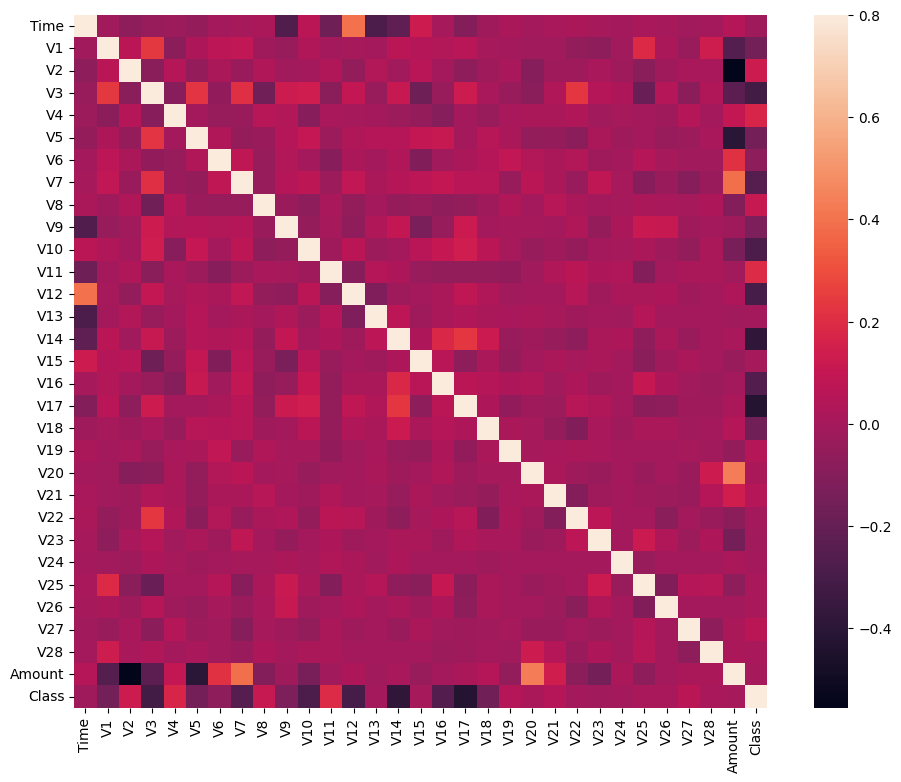

In [11]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [12]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(93181, 30)
(93181,)


In [13]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [21]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [16]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

# Handle NaN values in Y before splitting
Y = Y.fillna(Y.mode()[0]) # Or use another strategy: Y.fillna(0), Y.dropna()

# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

# ... rest of the code (train_test_split, model training, evaluation)

(93181, 30)
(93181,)


In [18]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

# Handle NaN values in Y before splitting
Y = Y.fillna(Y.mode()[0]) # Or use another strategy: Y.fillna(0), Y.dropna()

# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

# ... rest of the code (train_test_split, model training, evaluation)

(93181, 30)
(93181,)


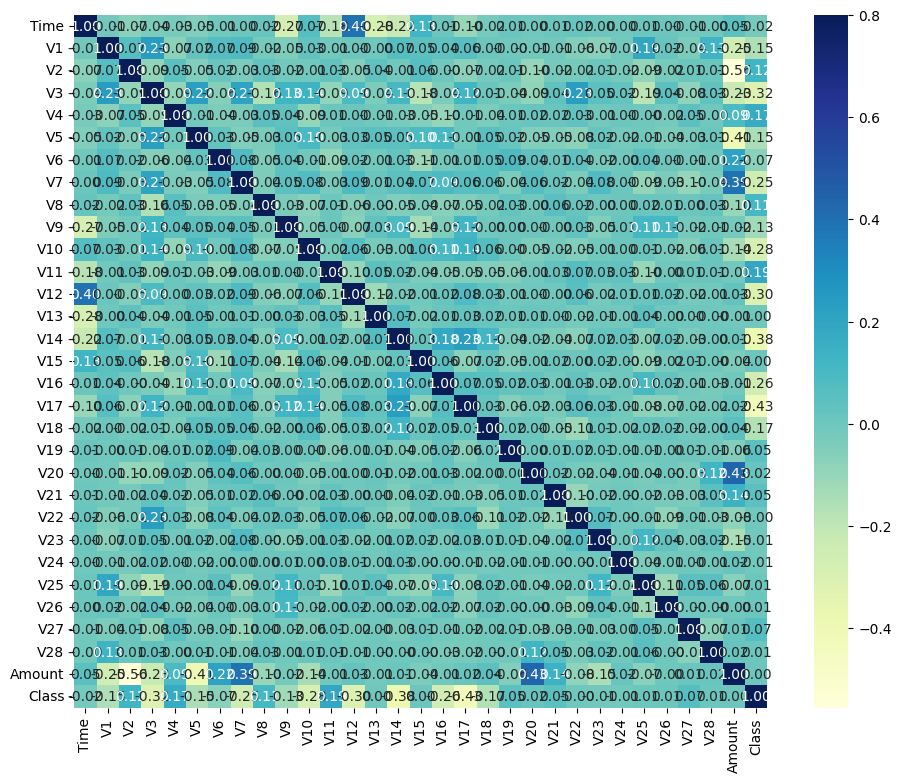

In [22]:
# heat map

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'corrmat' is your correlation matrix (calculated earlier in your code)
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt=".2f", cmap="YlGnBu") # Added annot and fmt for values
plt.show()

In [23]:
# Assuming 'data' DataFrame is already loaded as in the provided code.

# Create a matrix from the 'Amount' and 'Time' columns.
amount_time_matrix = data[['Amount', 'Time']].values

# Print the shape of the matrix.
print("Shape of the Amount-Time matrix:", amount_time_matrix.shape)

# Display the first 5 rows of the matrix.
print("First 5 rows of the Amount-Time matrix:\n", amount_time_matrix[:5])

Shape of the Amount-Time matrix: (93181, 2)
First 5 rows of the Amount-Time matrix:
 [[149.62   0.  ]
 [  2.69   0.  ]
 [378.66   1.  ]
 [123.5    1.  ]
 [ 69.99   2.  ]]


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18594
         1.0       0.97      0.74      0.84        43

    accuracy                           1.00     18637
   macro avg       0.98      0.87      0.92     18637
weighted avg       1.00      1.00      1.00     18637

Accuracy Score: 0.9993561195471374


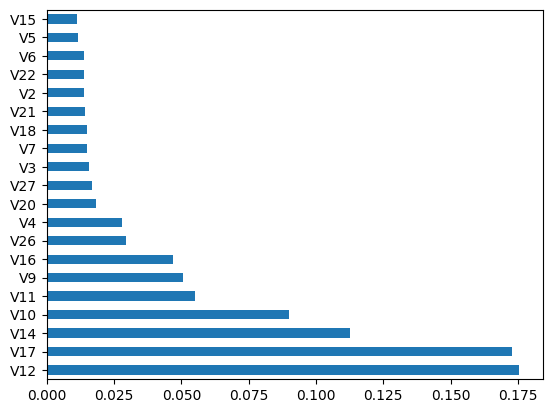

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming 'creditcard.csv' is in the current working directory)
data = pd.read_csv("creditcard.csv")

# ... (rest of your existing code for data exploration and preprocessing)

# Split data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
    xData, yData, test_size=0.2, random_state=42
)

# Initialize and train the Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# Make predictions on the test set
yPred = rfc.predict(xTest)

# Evaluate the model
print(classification_report(yTest, yPred))
print("Accuracy Score:", accuracy_score(yTest,yPred))


# Visualize the feature importances
feature_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [25]:
from sklearn.metrics import classification_report, accuracy_score

# predictions
yPred = rfc.predict(xTest)
# Evaluating the classifier
# printing every score of the classifier
# showing the main classification metrics
print(classification_report(yTest, yPred))
# printing the accuracy of the model
acc_score = accuracy_score(yTest, yPred)
print("The accuracy of the model is {}".format(acc_score))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18594
         1.0       0.97      0.74      0.84        43

    accuracy                           1.00     18637
   macro avg       0.98      0.87      0.92     18637
weighted avg       1.00      1.00      1.00     18637

The accuracy of the model is 0.9993561195471374


In [ ]:
# prompt:  Visualizing the Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming yTest and yPred are already defined from your model's prediction
cm = confusion_matrix(yTest, yPred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine', 'Fraud'],
            yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

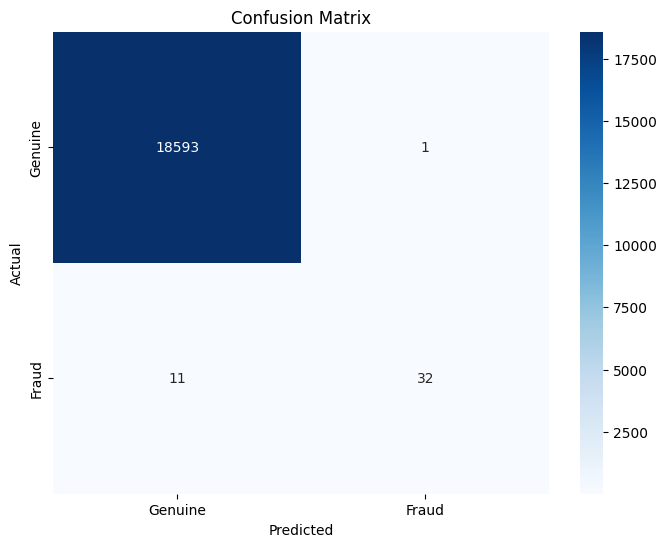

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming yTest and yPred are already defined from your model's prediction
cm = confusion_matrix(yTest, yPred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine', 'Fraud'],
            yticklabels=['Genuine', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer # Import the Imputer
from sklearn.metrics import classification_report, accuracy_score

# ... (Your existing code for loading and preprocessing data) ...

# Split data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
    xData, yData, test_size=0.2, random_state=42
)

# Impute NaN values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
xTrain = imputer.fit_transform(xTrain) # Fit and transform on training data
xTest = imputer.transform(xTest) # Transform the testing data

# Initialize and train the Support Vector Classifier
svm_model = SVC()
svm_model.fit(xTrain, yTrain)

# Make predictions on the test set
svm_yPred = svm_model.predict(xTest)

# Evaluate the SVM model
print(classification_report(yTest, svm_yPred))
print("Accuracy Score (SVM):", accuracy_score(yTest, svm_yPred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18594
         1.0       0.00      0.00      0.00        43

    accuracy                           1.00     18637
   macro avg       0.50      0.50      0.50     18637
weighted avg       1.00      1.00      1.00     18637

Accuracy Score (SVM): 0.9976927617105757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
